In [8]:
import pandas as pd 
from zat.log_to_dataframe import LogToDataFrame
from pathlib import Path
from matplotlib import pyplot as plt

In [9]:
data_dir = Path('../../data/Raw').resolve()
normal_dir = data_dir / 'Normal'
malware_dir = data_dir / 'Malware'
user_dir = normal_dir / 'CTU-Normal-50'
day1_dir = user_dir / 'Day1'

In [10]:
list(day1_dir.iterdir())

[PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/conn.log'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/conn.log.labeled'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/dns.log'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/dns.log.labeled'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/files.log'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/files.log.labeled'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/http.log'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/http.log.labeled'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/known_hosts.log'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/known_hosts.log.labeled'),
 PosixPath('/home.nfs/janatpa3/mthesis/data/Raw/Normal/CTU-Normal-50/Day1/known_servic

In [11]:
data = {}
for file in day1_dir.iterdir():
    if file.suffix == '.log':
        data[file.stem] =  LogToDataFrame().create_dataframe(file)
        label_file = file.parent / f'{file.name}'
        if label_file.exists():
            data[f'{file.stem}_labeled'] = LogToDataFrame().create_dataframe(label_file)

In [14]:
data['x509_labeled']

,id,certificate.version,certificate.serial,certificate.subject,certificate.issuer,certificate.not_valid_before,certificate.not_valid_after,certificate.key_alg,certificate.sig_alg,certificate.key_type,certificate.key_length,certificate.exponent,certificate.curve,san.dns,san.uri,san.email,san.ip,basic_constraints.ca,basic_constraints.path_len
ts,,,,,,,,,,,,,,,,,,,
2022-06-13 07:09:02.385682176,FRx7GZ25II90mC9q,3,33000000368FAFB8A10792A367000000000036,"CN=*.prod.do.dsp.mp.microsoft.com,OU=DSP,O=Mic...",CN=Microsoft ECC Content Distribution Secure S...,2021-09-23 15:54:54,2022-09-23 15:54:54,id-ecPublicKey,ecdsa-with-SHA384,ecdsa,256,NaN,prime256v1,*.prod.do.dsp.mp.microsoft.com,NaN,NaN,NaN,F,<NA>
2022-06-13 07:09:02.385682176,F4okzv3UMC6XgtAo7j,3,3300000009066CB601E4418E73000000000009,CN=Microsoft ECC Content Distribution Secure S...,CN=Microsoft ECC Product Root Certificate Auth...,2018-12-07 19:05:35,2033-12-07 19:15:35,id-ecPublicKey,ecdsa-with-SHA384,ecdsa,384,NaN,secp384r1,NaN,NaN,NaN,NaN,T,<NA>
2022-06-13 07:09:02.468125184,F9y5RDTYkhme3W9c,3,33000000368FAFB8A10792A367000000000036,"CN=*.prod.do.dsp.mp.microsoft.com,OU=DSP,O=Mic...",CN=Microsoft ECC Content Distribution Secure S...,2021-09-23 15:54:54,2022-09-23 15:54:54,id-ecPublicKey,ecdsa-with-SHA384,ecdsa,256,NaN,prime256v1,*.prod.do.dsp.mp.microsoft.com,NaN,NaN,NaN,F,<NA>
2022-06-13 07:09:02.468125184,Fu2f831iI6mFB3oXdg,3,3300000009066CB601E4418E73000000000009,CN=Microsoft ECC Content Distribution Secure S...,CN=Microsoft ECC Product Root Certificate Auth...,2018-12-07 19:05:35,2033-12-07 19:15:35,id-ecPublicKey,ecdsa-with-SHA384,ecdsa,384,NaN,secp384r1,NaN,NaN,NaN,NaN,T,<NA>
2022-06-13 07:09:19.968836096,FxMc2JZARu9cRwfZ8,3,1200168B7880EA48BB9BC58520000000168B78,CN=*.wns.windows.com,"CN=Microsoft RSA TLS CA 01,O=Microsoft Corpora...",2021-08-17 15:44:18,2022-08-17 15:44:18,rsaEncryption,sha256WithRSAEncryption,rsa,2048,65537,NaN,*.wns.windows.com,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13 16:09:52.476481792,F2XxaY2dyyXEgdbZaj,3,01FDA3EB6ECA75C888438B724BCFBC91,"CN=DigiCert SHA2 Secure Server CA,O=DigiCert I...","CN=DigiCert Global Root CA,OU=www.digicert.com...",2013-03-08 11:00:00,2023-03-08 11:00:00,rsaEncryption,sha256WithRSAEncryption,rsa,2048,65537,NaN,NaN,NaN,NaN,NaN,T,0
2022-06-13 16:09:52.508121088,FhLkjY3ke0P0IgBkQd,3,05D9F39466D6E20190671641A6688500,"CN=*.adnxs.com,O=Xandr Inc.,L=New York,ST=New ...","CN=GeoTrust ECC CA 2018,OU=www.digicert.com,O=...",2022-02-10 23:00:00,2023-03-14 22:59:59,id-ecPublicKey,ecdsa-with-SHA256,ecdsa,256,NaN,prime256v1,"*.adnxs.com,adnxs.com",NaN,--,F,NaN,<NA>
2022-06-13 16:09:52.508121088,FAiguiuOv2fZ4rWRb,3,0F1C20273B1E33422D6733811789DD5A,"CN=GeoTrust ECC CA 2018,OU=www.digicert.com,O=...","CN=DigiCert Global Root CA,OU=www.digicert.com...",2017-11-06 11:24:09,2027-11-06 11:24:09,id-ecPublicKey,sha256WithRSAEncryption,ecdsa,256,NaN,prime256v1,NaN,NaN,NaN,-T,0,<NA>


/mnt/appl/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 459825.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


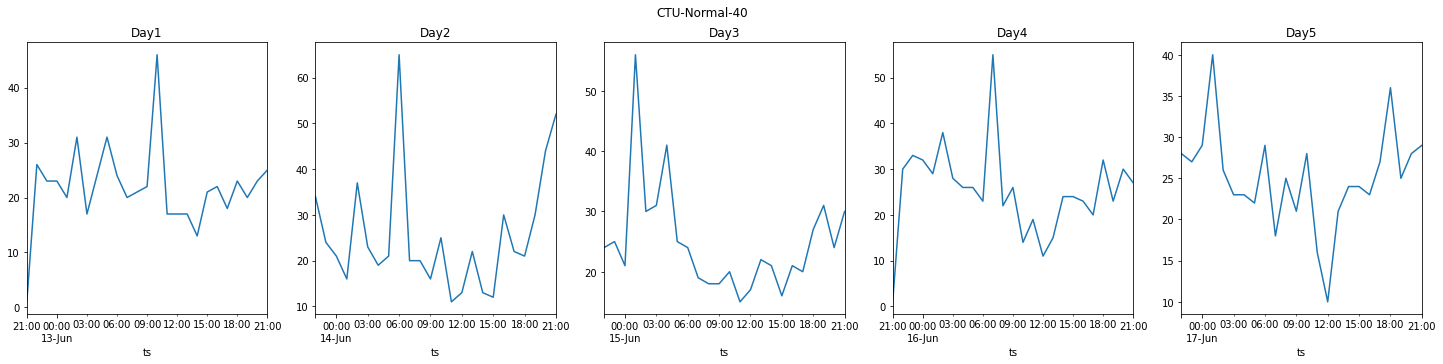

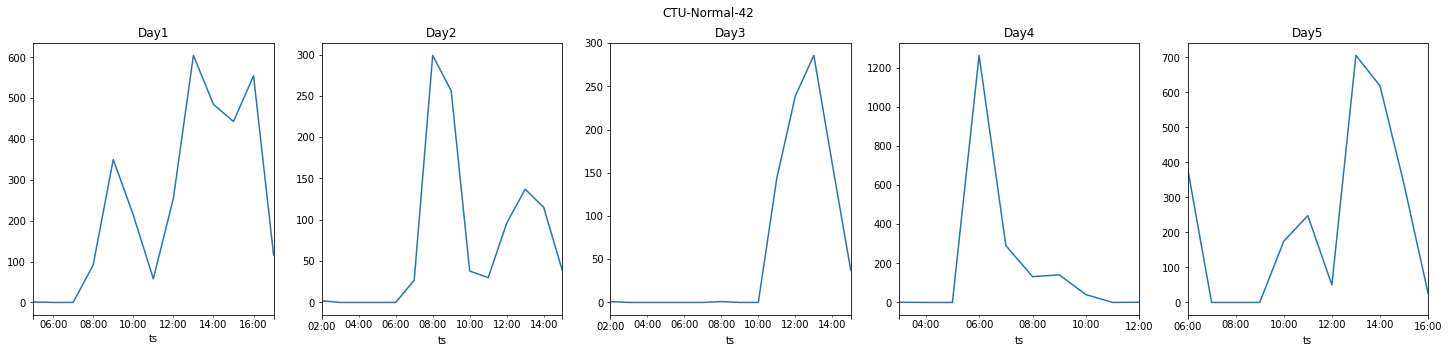

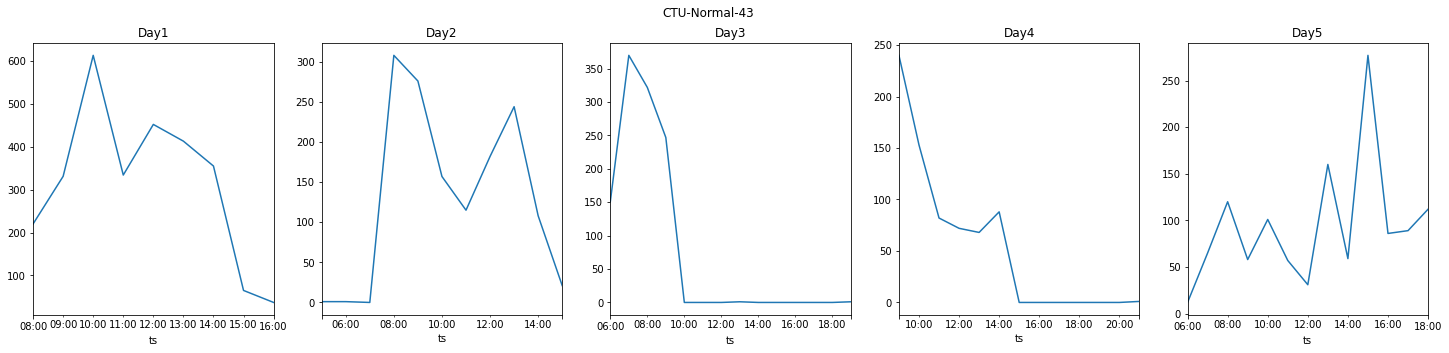

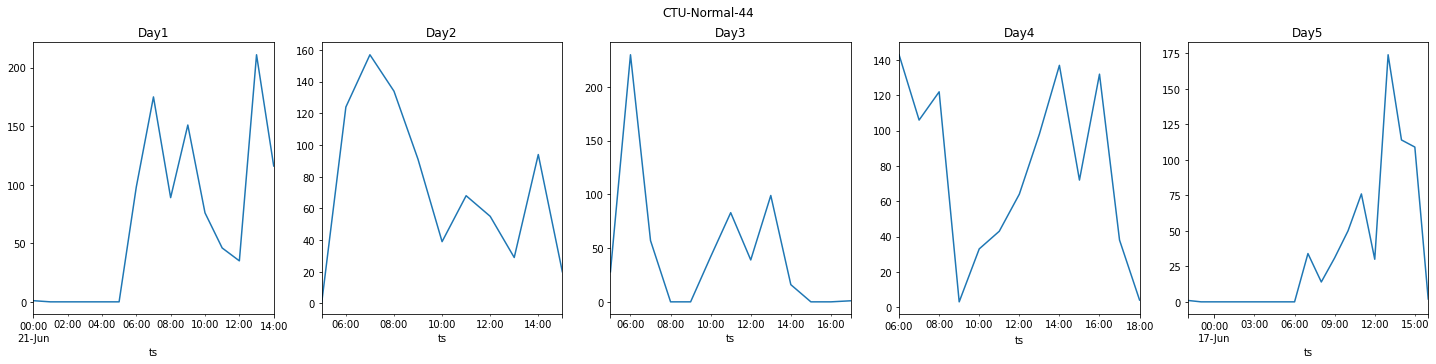

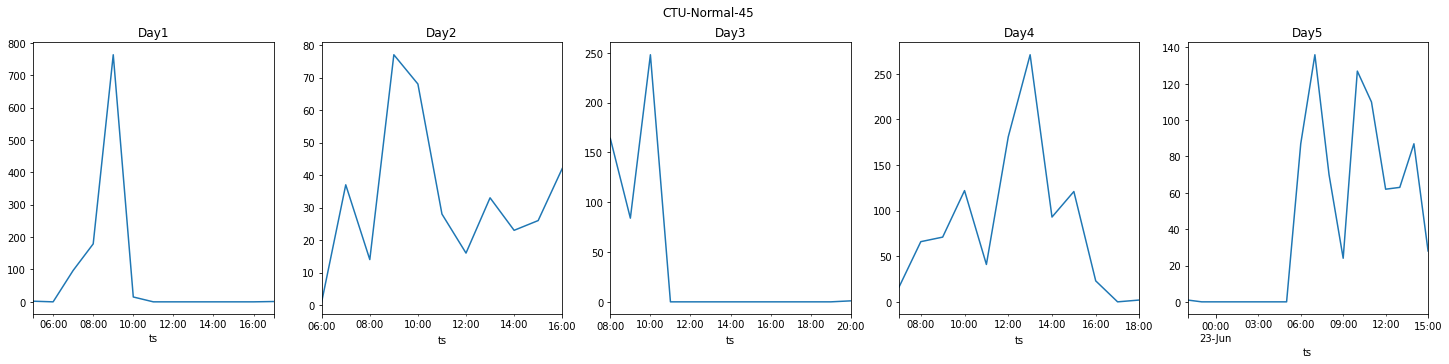

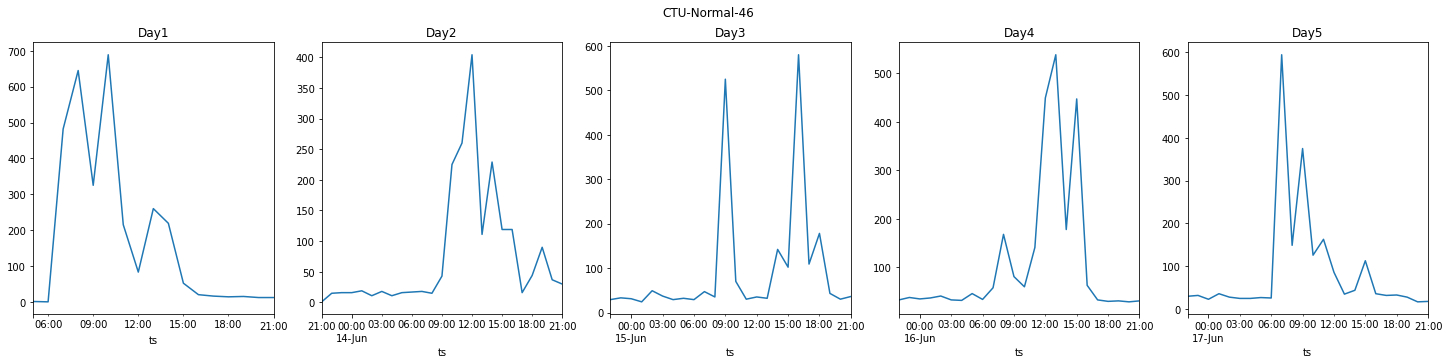

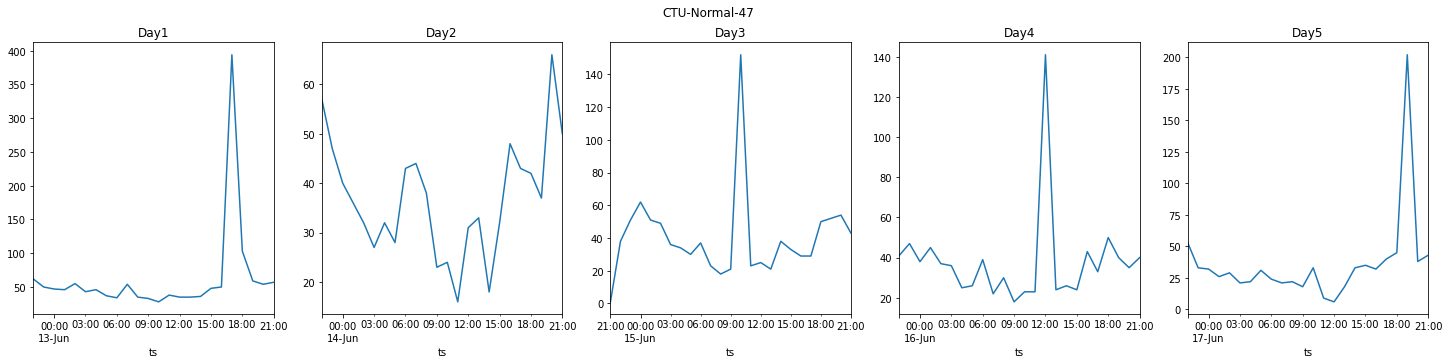

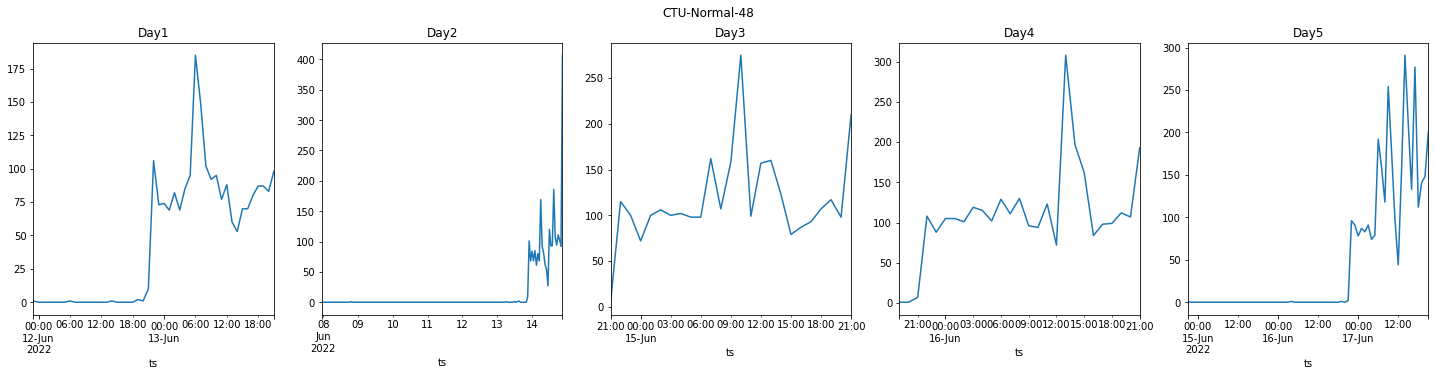

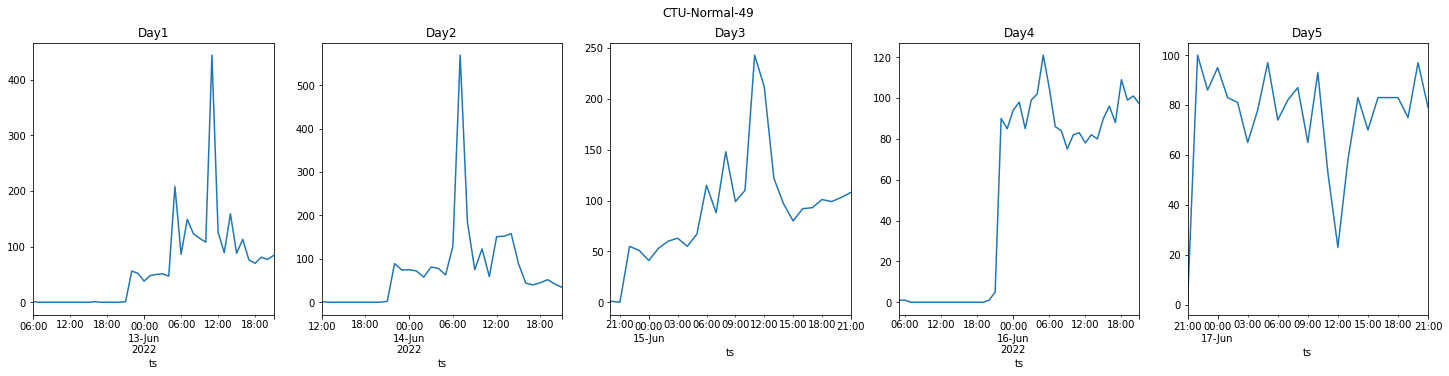

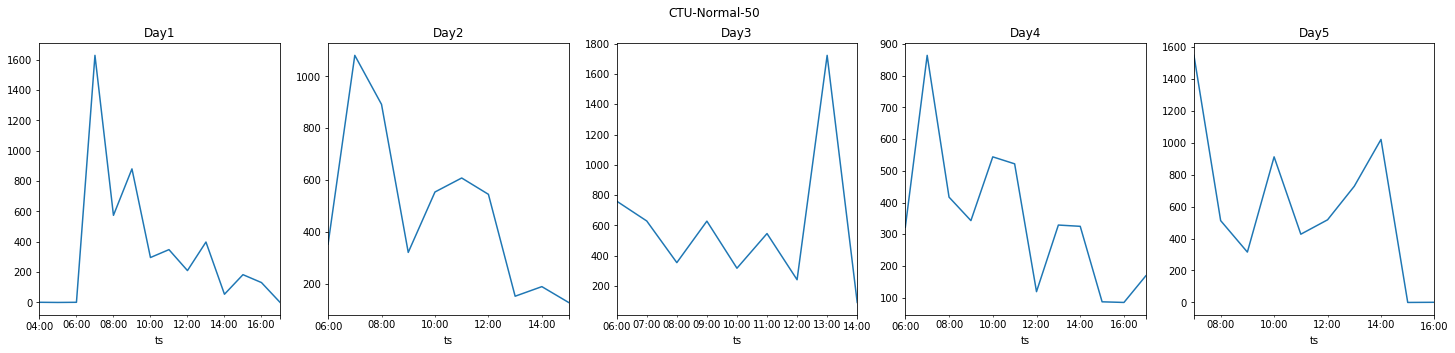

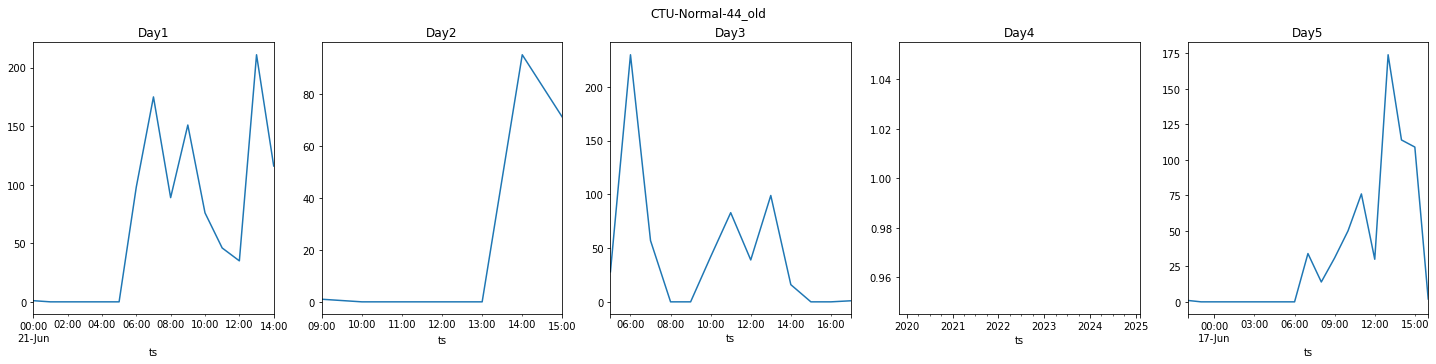

In [15]:
for normal_user_dir in normal_dir.iterdir():
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    fig.suptitle(normal_user_dir.name)
    for day, ax in zip(normal_user_dir.iterdir(), axs):
        ssl = LogToDataFrame().create_dataframe(day / 'ssl.log.labeled')
        if len(ssl):   
            times = ssl.index.to_series()
            times.groupby(pd.Grouper(freq='1H')).count().plot(ax=ax, title=day.stem)

/mnt/appl/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/mnt/appl/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/mnt/appl/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/mnt/appl/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 0.0 r

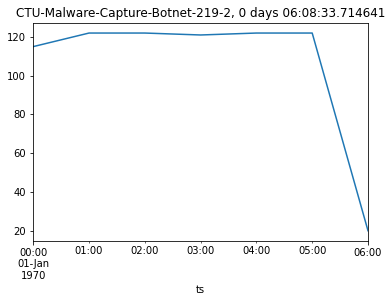

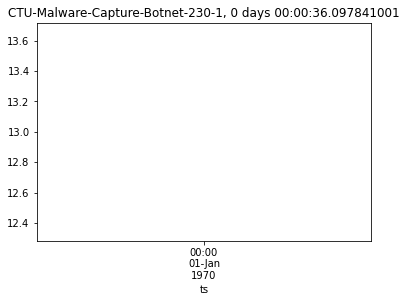

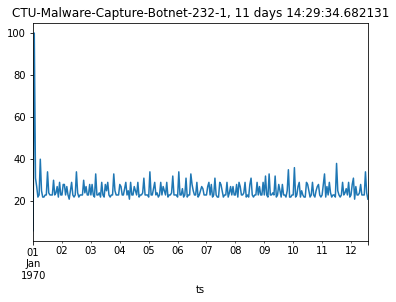

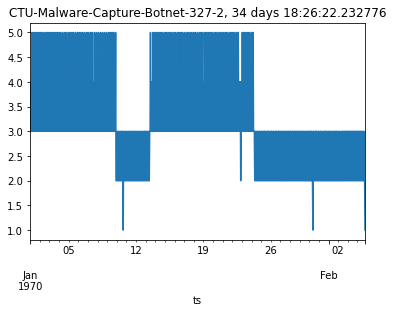

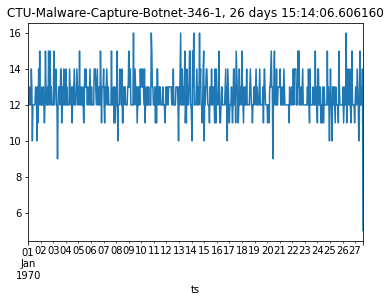

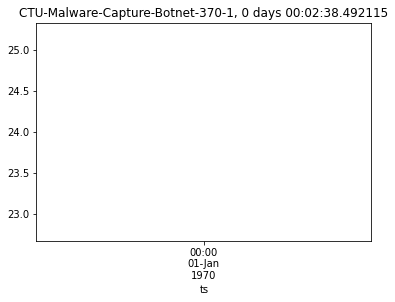

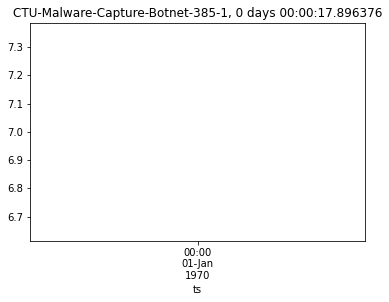

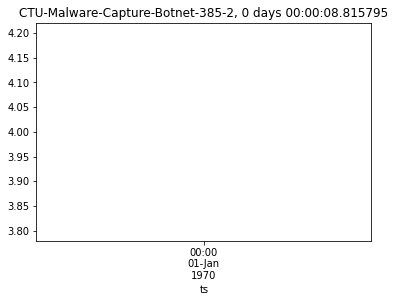

In [17]:
for malware_user_dir in malware_dir.iterdir():
    fig.suptitle(malware_user_dir.name)
    ssl_file = malware_user_dir / 'zeek' / 'ssl.log'
    ssl = LogToDataFrame().create_dataframe(ssl_file)
    plt.figure()
    if len(ssl):   
        times = ssl.index.to_series()
        span = times.max() - times.min()
        times.groupby(pd.Grouper(freq='1H')).count().plot(title=f'{malware_user_dir.name}, {span}')